In [10]:
import numpy as np
import matplotlib.pyplot as plt

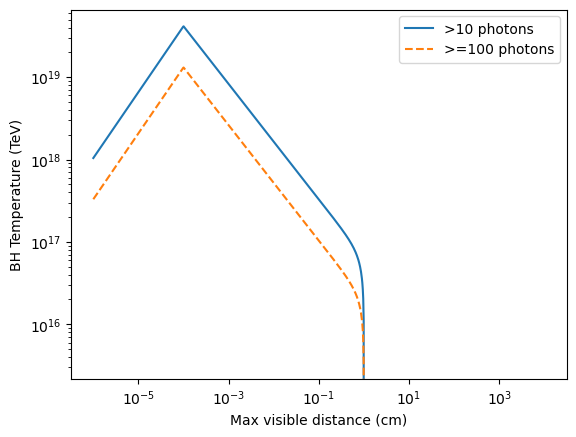

In [88]:

# temperature T (TeV), distance d (cm) --> flux (cm^2 s^-1)
flux = lambda d, T: 1.4 * 1e29 * T**(1.6) / (4 * 3.14159 * d**2)

# remaining lifetime (s)
tau = lambda T: 407 * (1.06 / T)**3

# effective time of exposure to energy band at temperature T
def effective_time(T, E_low, E_high):
    if T > E_high: # 
        return 0#1e-99
    elif T < E_low:
        return tau(E_low) - tau(E_high)
    else: # E_low < T < E_high
        return tau(T) - tau(E_high)

GammaBkg = lambda E: 1.4 * 1e-6 * E**(-2.1)

avg_photon_energy = lambda T: 10 * T**.5



def max_distance_contour(temp, cutoff = 10,
    Aeff = .8 * 1e4, # LAT numbers
    E_low = .1 * 1e-3,
    E_high = 1):
    """
    For cutoff = 10
    Aeff . tau(T,E+,E-) . Flux(T,d) >= 10
    Flux(T,d) = 1.4e29 T^1.6 / 4pi d^2

    d^2 = (1.4e29 . T^1.6 / 4pi) . (Aeff . tau(T,E+,E-) / 10)
    """
    return np.sqrt(
        ( 1.4 * 1e29 * temp**1.6 * Aeff * effective_time(temp, E_low, E_high) ) / (4 * 3.14159 * cutoff)
    )

temp = np.logspace(-6, 4, 1_000)
plt.loglog(temp,[max_distance_contour(t) for t in temp], label = '>10 photons')
plt.loglog(temp, [max_distance_contour(t, cutoff = 100) for t in temp], '--', label = '>=100 photons')
plt.xlabel('Max visible distance (cm)')
plt.ylabel('BH Temperature (TeV)')
plt.legend()